Student Performance Indicator
--------------

**Life cycle of Machine Learning Project**

    -> understanding the probelm statement
    -> Data collection
    -> Data checks to perform
    -> Exploratory data analysis
    -> Data pre-processing
    -> Model Training
    -> Choose best model

Problem Statement
-----------

This project understand how the student's performance (test scores) is affected by other variables such as Gender , Ethnicity, parental elvel of education, Lunch and Test preparation course.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas Dataframe
---------

In [2]:
df = pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

Dataset Information
-------

- gender : sex pf students -> (male / female)
- race/ethnicity : ethnicity of students -> (Group A,B,C,D,E)
- parental level of education : Parents' final education -> (bachelor's degree, some college , master's college , associate's degree, hogh school)
- lunch : having lunch before test (standard or free/reduced)
- test prepapration course : complete or not complete besore test
- math score
- reading score
- writing score


Data Checks to Perform
---------------

- check missing values
- check duplicates
- check datatype
- check the number of unique values of each column
- check statistics of data set
- check various categories present in the different categorical column

Check Missing Values
------------

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


check the number of unique values in dataset
-------

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploratory data
------

In [10]:
print("Categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable:    ",end=" ")
print(df['race/ethnicity'].unique())

print("categories in 'parental level of education' variable:    ",end=" ")
print(df['parental level of education'].unique())

print("categories in 'lunch' variable:    ",end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable:    ",end=" ")
print(df['test preparation course'].unique())


Categories in 'gender' variable:    ['female' 'male']
categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:     ['standard' 'free/reduced']
categories in 'test preparation course' variable:     ['none' 'completed']


In [11]:
# define numerical & categorical feature
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# prinnt columns
print('We have {} numeric features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numeric features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Addinng columns for "Total Score" and "Average"
----------

In [12]:
df['Total score']= df['math score']+ df['reading score'] + df['writing score']
df['Average'] = df['Total score']/3 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading score'] == 100]['Average'].count()
writing_full = df[df['writing score'] == 100]['Average'].count()
math_full = df[df['math score'] == 100]['Average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
reding_less_20 = df[df['reading score'] <=20]['Average'].count()
writing_less_20 = df[df['writing score'] <=20]['Average'].count()
math_less_20 = df[df['math score'] <=20]['Average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reding_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


**Insights**

- From above values we get studnts have performed the worst in maths
- Best performance is in reading section

Exploring Data (Visualization)
-------

**visualize average score distribution to make some conclusion**
- Histograms
- Kernel Distribution Function (KDE)

**Histogram & KDE**

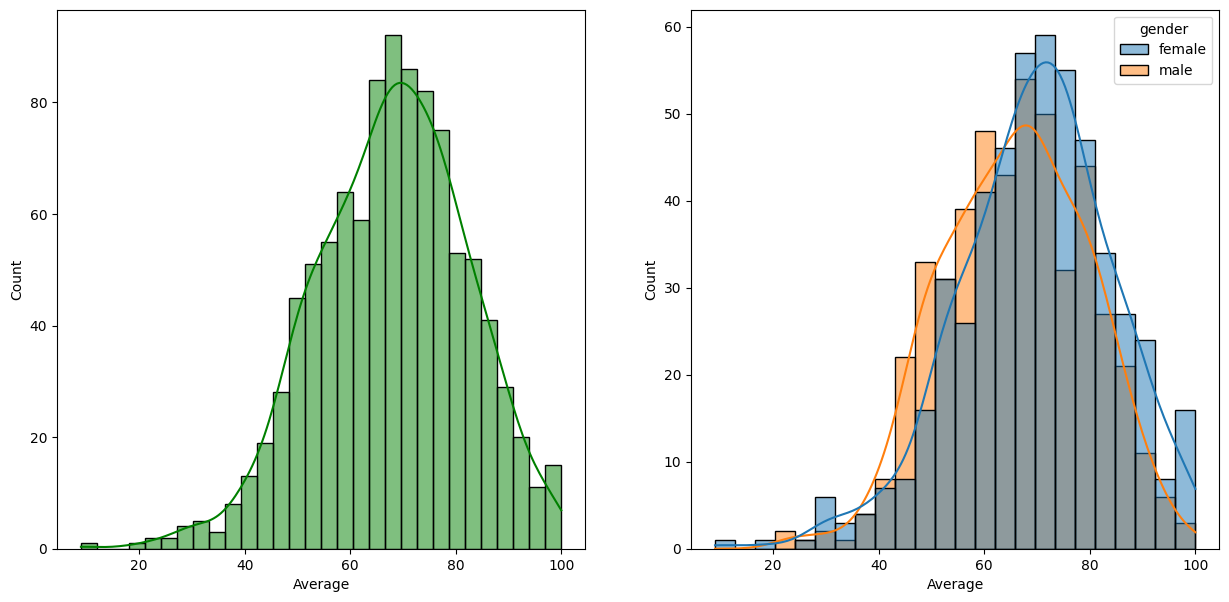

In [15]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df , x='Average' , bins=30, kde=True , color='g')
plt.subplot(122)
sns.histplot(data=df , x='Average', kde=True ,hue='gender')
plt.show()

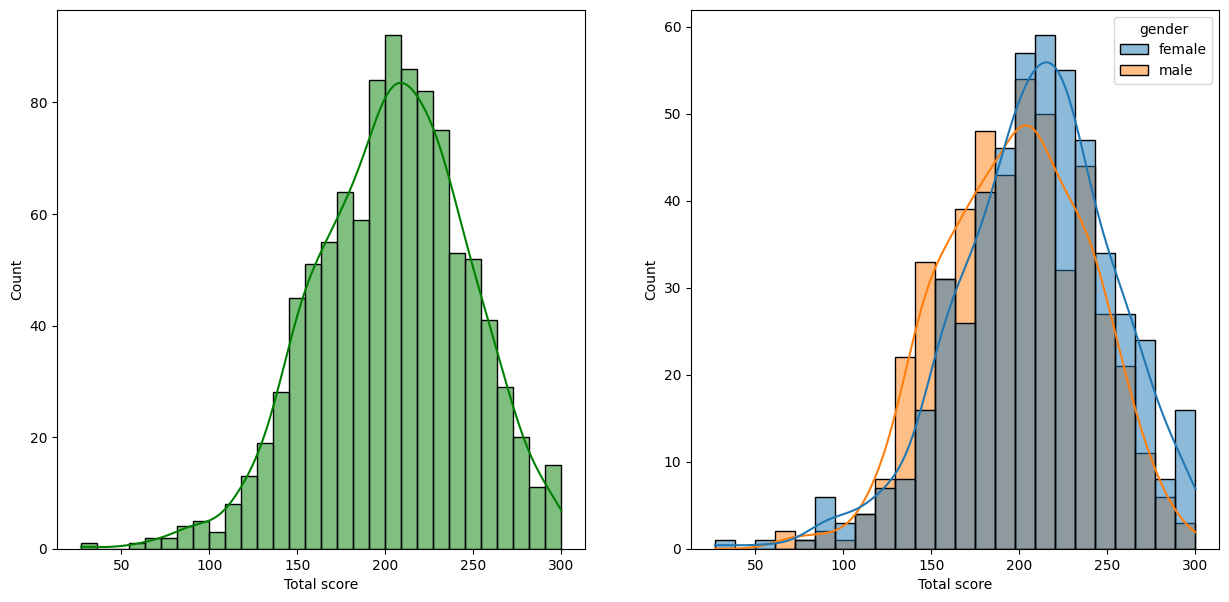

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df , x='Total score' , bins=30, kde=True , color='g')
plt.subplot(122)
sns.histplot(data=df , x='Total score', kde=True ,hue='gender')
plt.show()

**Insight**

- Female students tend to perform well than male students

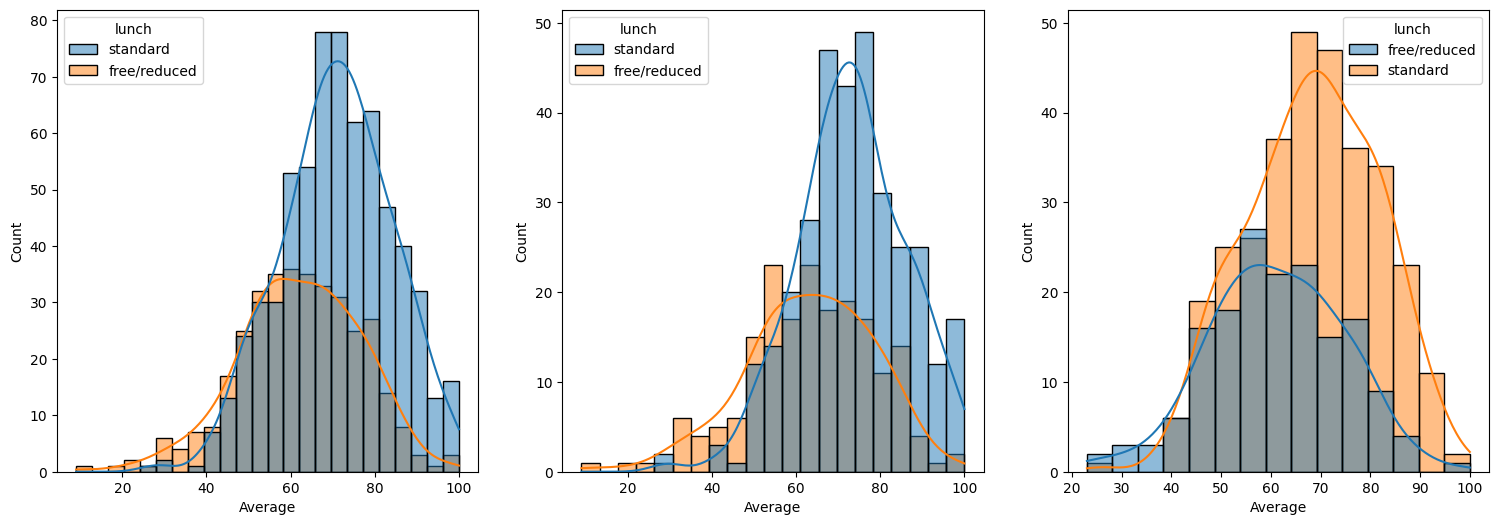

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df , x='Average' , kde=True , hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'] , x='Average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'] , x='Average', kde=True, hue='lunch')
plt.show()

**Insight**

- standard lunch helps perform well in exams
- standard lunch helps perform well in exams be it a male or a female

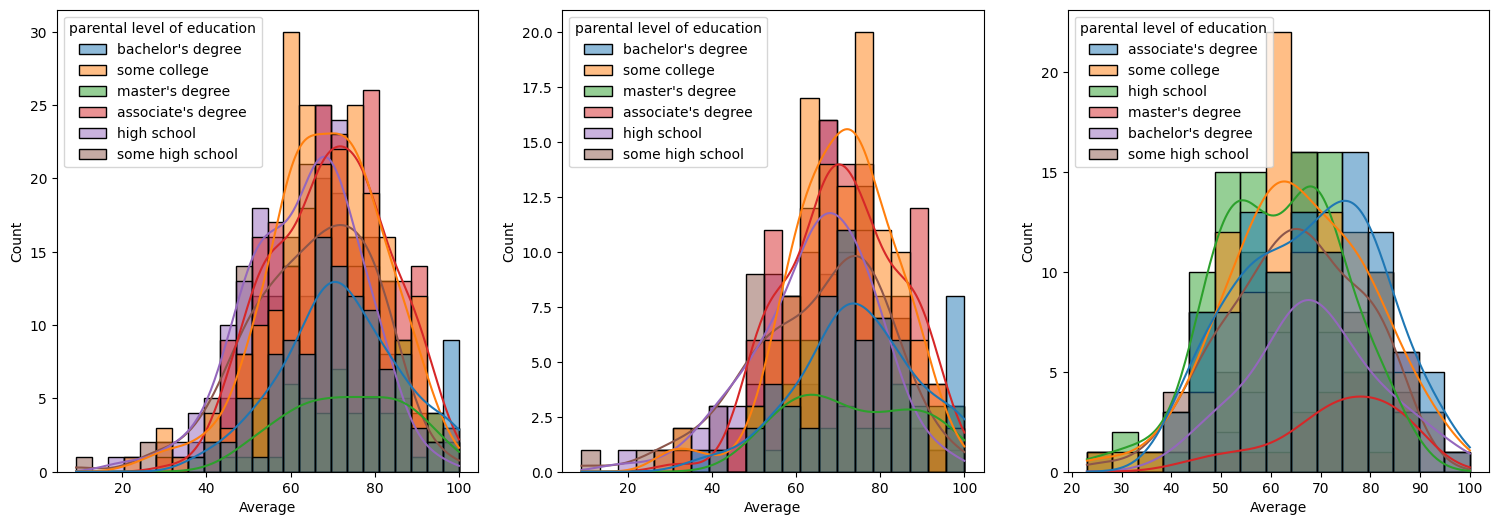

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df , x='Average' , kde=True , hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'] , x='Average', kde=True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'] , x='Average', kde=True, hue='parental level of education')
plt.show()

**Insights**

- in general parent's education don't help student perform well in exam
- 2nd plot we can see there is no effect of parent's education on female students
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

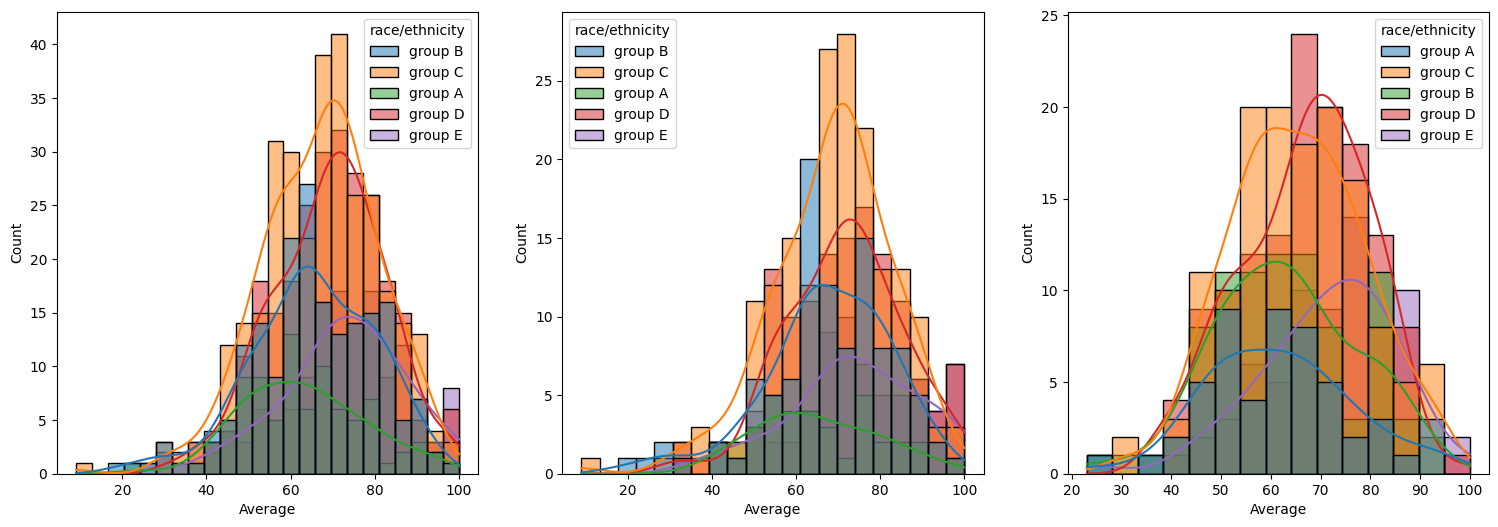

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df , x='Average' , kde=True , hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'] , x='Average', kde=True, hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'] , x='Average', kde=True, hue='race/ethnicity')
plt.show()

**insights**

- students of group A and group B tends to perform poorly in exam
-  students of group A and group B tends to perform poorly in exam irrespective of whether there are male or female


Maximum Score of students in all three subjects
-------

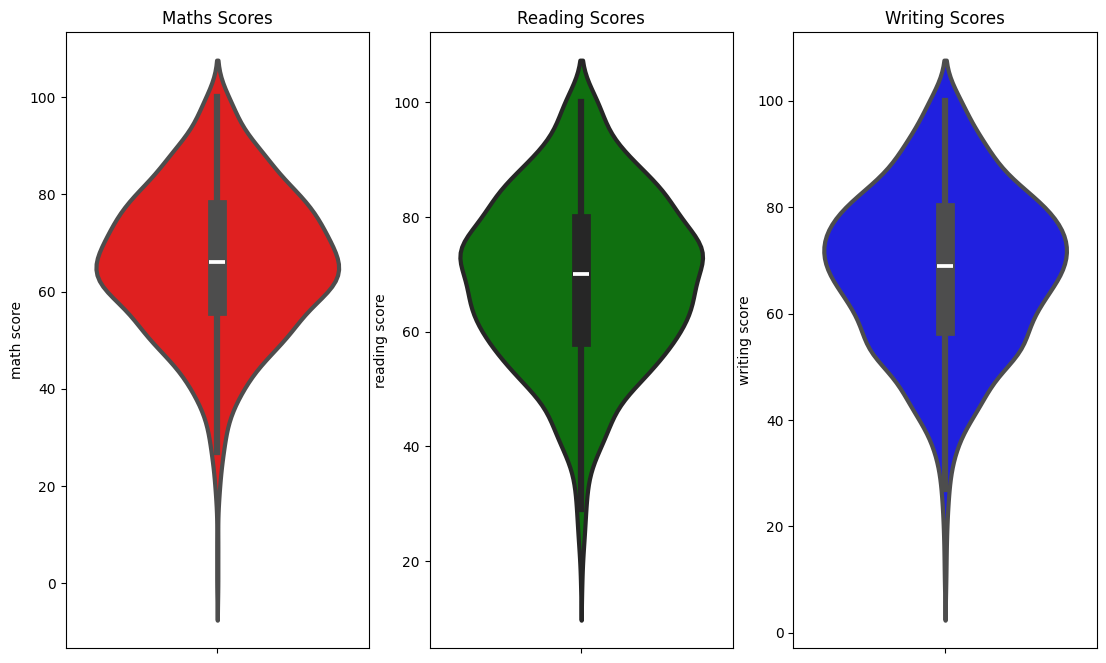

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("Maths Scores")
sns.violinplot(y='math score', data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title("Reading Scores")
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title("Writing Scores")
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)
plt.show()

**Insights**

- From the above three plots its Clearly visible that most of the students score in between 60-80 in maths whereas in reading and writing most of them score fromm 50-80 

Multivariate analysis using pieplot
------

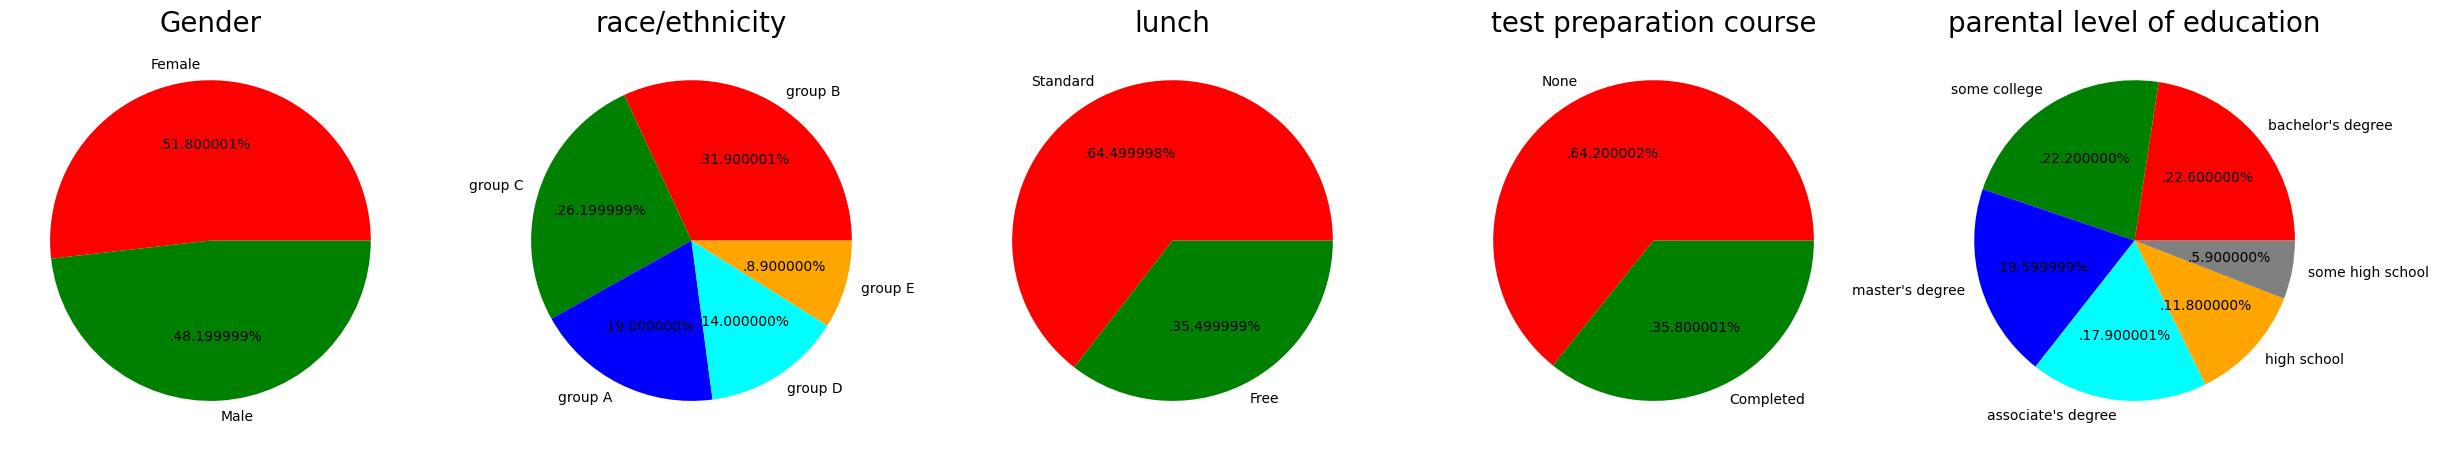

In [23]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = "Female" , "Male"
color = ['red', 'green']

plt.pie(size , colors=color , labels=labels, autopct='.%2f%%')
plt.title("Gender" , fontsize = 20)
plt.axis("off")


plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'group B', 'group C', 'group A' ,'group D', 'group E'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size , colors=color , labels=labels, autopct='.%2f%%')
plt.title("race/ethnicity" , fontsize = 20)
plt.axis("off")


plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard' , 'Free'
color = ['red', 'green']

plt.pie(size , colors=color , labels=labels, autopct='.%2f%%')
plt.title("lunch" , fontsize = 20)
plt.axis("off")


plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = "None" , "Completed"
color = ['red', 'green']

plt.pie(size , colors=color , labels=labels, autopct='.%2f%%')
plt.title("test preparation course" , fontsize = 20)
plt.axis("off")

plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
labels = "bachelor's degree", 'some college' ,"master's degree" ,"associate's degree",'high school' ,'some high school'
color = ['red', 'green', 'blue', 'cyan', 'orange' , 'grey']

plt.pie(size , colors=color , labels=labels, autopct='.%2f%%')
plt.title("parental level of education" , fontsize = 20)
plt.axis("off")

plt.grid()

plt.show()





Feature wise Visualization
--------

**Gender Column**

- how is distribution of gender?
- is gender has any impact on student's performance?

***UNIVARIATE ANALYSIS (How is distribution of Gender ?)***


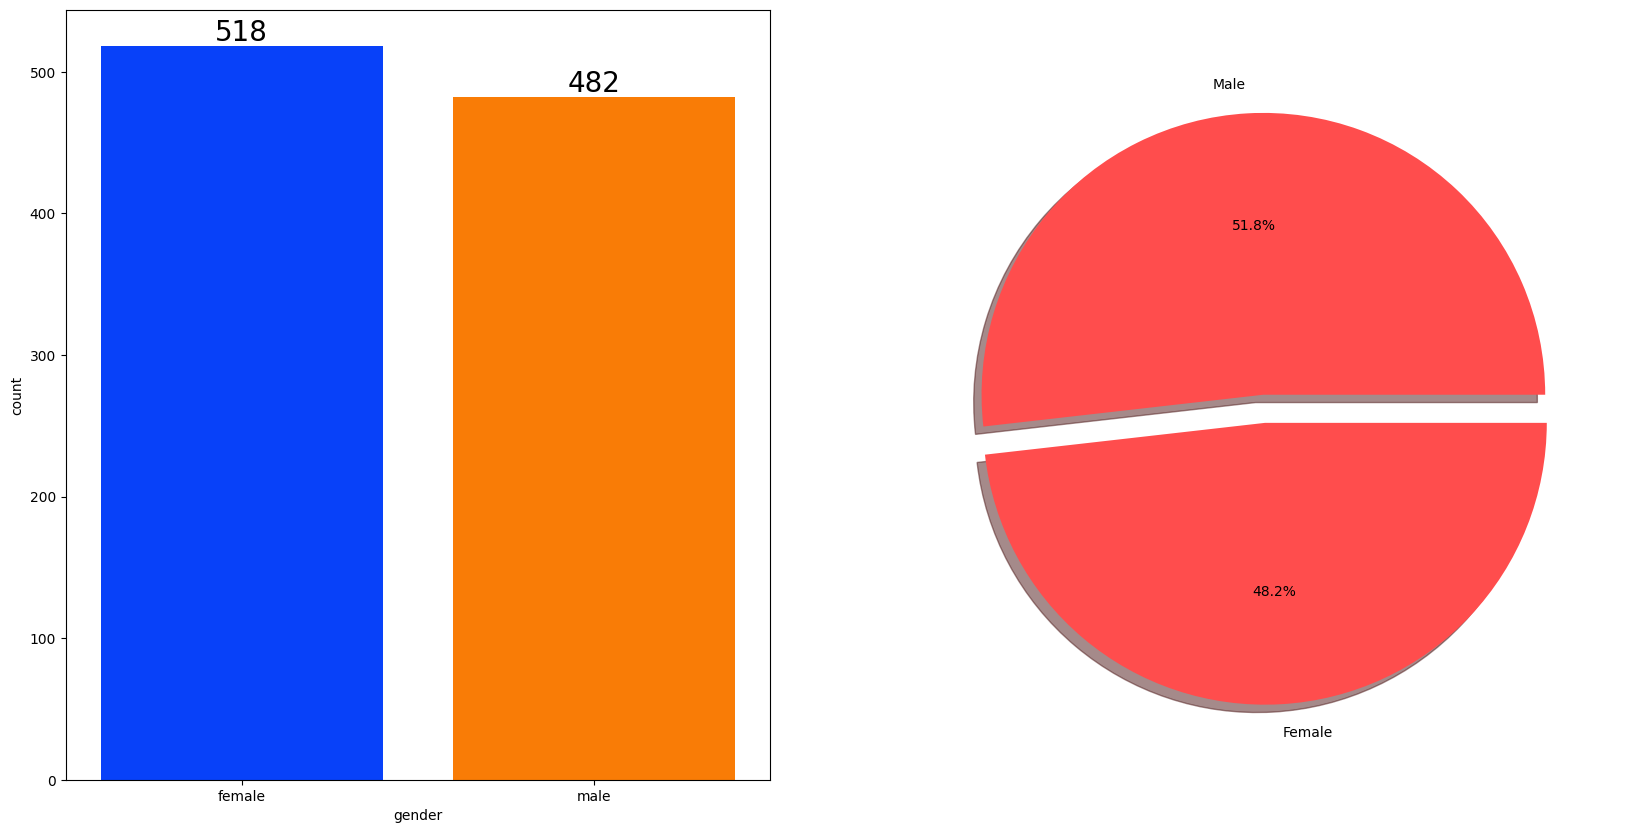

In [25]:
f , ax=plt.subplots(1,2, figsize=(20,10))

sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black' , size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0,0.1], autopct='%1.1f%%', shadow=True , colors=['#ff4d4d'])
plt.show()    

***BIVARIATE ANALYSIS (Is gender has any imoact on student's performance ?)***

In [29]:
gender_group = df.groupby('gender').mean()
gender_group

TypeError: Could not convert group Bgroup Cgroup Bgroup Bgroup Bgroup Bgroup Bgroup Agroup Cgroup Bgroup Cgroup Bgroup Cgroup Cgroup Dgroup Dgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Bgroup Egroup Agroup Cgroup Dgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Cgroup Cgroup Dgroup Agroup Dgroup Egroup Bgroup Cgroup Cgroup Dgroup Agroup Dgroup Cgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Dgroup Bgroup Bgroup Dgroup Dgroup Egroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Dgroup Cgroup Egroup Cgroup Dgroup Bgroup Cgroup Egroup Bgroup Egroup Egroup Cgroup Bgroup Bgroup Cgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Cgroup Egroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Bgroup Bgroup Bgroup Cgroup Egroup Cgroup Dgroup Cgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Dgroup Bgroup Egroup Cgroup Bgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Dgroup Egroup Dgroup Dgroup Cgroup Egroup Cgroup Dgroup Dgroup Bgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Bgroup Cgroup Cgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Bgroup Dgroup Cgroup Bgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Cgroup Dgroup Agroup Dgroup Cgroup Dgroup Dgroup Dgroup Dgroup Agroup Bgroup Egroup Agroup Egroup Egroup Cgroup Dgroup Dgroup Cgroup Bgroup Cgroup Cgroup Agroup Dgroup Cgroup Cgroup Bgroup Dgroup Dgroup Cgroup Cgroup Dgroup Dgroup Agroup Cgroup Cgroup Agroup Cgroup Dgroup Agroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Egroup Egroup Cgroup Cgroup Dgroup Agroup Cgroup Cgroup Cgroup Dgroup Bgroup Dgroup Dgroup Dgroup Bgroup Cgroup Agroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Dgroup Bgroup Egroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Egroup Dgroup Bgroup Cgroup Cgroup Dgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Dgroup Agroup Cgroup Bgroup Cgroup Cgroup Bgroup Dgroup Cgroup Dgroup Egroup Dgroup Cgroup Cgroup Egroup Bgroup Bgroup Dgroup Dgroup Egroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Agroup Egroup Cgroup Cgroup Dgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Egroup Bgroup Cgroup Cgroup Agroup Cgroup Egroup Cgroup Egroup Cgroup Bgroup Cgroup Bgroup Dgroup Dgroup Dgroup Bgroup Egroup Bgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Bgroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Dgroup Bgroup Egroup Cgroup Dgroup Cgroup Egroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Cgroup Agroup Dgroup Egroup Bgroup Dgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Cgroup Cgroup Cgroup Bgroup Egroup Dgroup Bgroup Cgroup Egroup Bgroup Agroup Cgroup Cgroup Cgroup Cgroup Egroup Dgroup Cgroup Dgroup Bgroup Bgroup Cgroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Agroup Dgroup Bgroup Bgroup Cgroup Bgroup Egroup Bgroup Cgroup Bgroup Dgroup Bgroup Egroup Egroup Cgroup Egroup Bgroup Cgroup Dgroup Egroup Cgroup Cgroup Agroup Bgroup Cgroup Agroup Dgroup Bgroup Cgroup Cgroup Cgroup Dgroup Agroup Cgroup Bgroup Cgroup Agroup Cgroup Dgroup Bgroup Dgroup Cgroup Agroup Egroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Cgroup Dgroup Dgroup Egroup Bgroup Egroup Cgroup Egroup Dgroup Egroup Egroup Agroup Egroup Egroup Bgroup Dgroup Cgroup Agroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Bgroup Egroup Cgroup Cgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Bgroup Cgroup Dgroup Egroup Dgroup Egroup Cgroup Dgroup Dgroup Agroup Dgroup Egroup Cgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Agroup Dgroup Bgroup Dgroup Dgroup Egroup Cgroup Dgroup D to numeric

In [28]:
plt.figure(figsize=(10,8))

X = ["Total Average", "Math Average"]

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4 , label = "Male")
plt.bar(X_axis + 0.2, female_scores, 0.4 , label = "Female")

plt.xticks(X_axis, X)
plt.ylabel("marks")
plt.title("Total average v/s Math average mark of both the genders", fontweight='bold')
plt.legend()
plt.show()

NameError: name 'gender_group' is not defined

<Figure size 1000x800 with 0 Axes>